# Big Data Mart Analysis

## Business Understanding

The Big Data Mart Dataset is used for predicting the future price trends of different items, and how each of the items contribute to the overall sales of the mart. We study the information related to different store outlets, different items present in the store, how the location of the stores influence the sales and what sort of products are sold most and contribute maximum to the overall sales of the Mart.

## Data Understanding

 
We can identify the target variable to be the Item_Outlet_Sales, and rest of the features are inputs to the model and are independent variables of the dataset.

Based on each feature, we can describe them as follows:

Product based features:
- Item Identifier: Unique code for each item
- Item Weight: The weight of the item selected in data
- Item Fat Content: It is the amount of fats present in the item generally consumable edibles
- Item Visibility: The amount of how much an item is being sold as a range of 0-1
- Item Type: Dairy, Soft Drinks, Meat, Fruits and Vegetables and Household supplies

Outlet based features:
- Outlet Identifier: It is the unique code assigned to each outlet
- Outlet Establishment Year: The founding year of outlet
- Outlet Size: Bigger, Medium or Small
- Outlet Location: It is based on rural to urban in form of Tiers
- Outlet Type: Nature of the shop

Target Feature:
- Item Outlet Sales: Total sales done in the outlet

## Hypotheses


1. Cities have higher sales than rural areas, hence Tier 1 locations will have highest sales.
2. Bigger stores will have higher sales, owing to convenience factor of finding products at single place.
3. Higher Visibilty products will have potentially higher sales
4. Higher marketed products and well-advertised products will have higher sales.

In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [363]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [182]:
def data_desc(data):
    print("Rows: ", data.shape[0])
    print("Columns: ", data.shape[1])
    print("First 5 Rows: ", data.head())
    print("Last 5 Rows: ", data.tail())
    print("/n Information of frames:/n")
    print(data.info())
    print("/n 5-Point Summary: /n")
    print(data.describe())

In [183]:
data_desc(train)

Rows:  8523
Columns:  12
First 5 Rows:    Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                  

In [184]:
data_desc(test)

Rows:  5681
Columns:  11
First 5 Rows:    Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Typ

In [185]:
def count_null(data):
    print(data.isna().sum())
    print("Percentage of Null Values: ", data.isna().sum()/len(train)*100)

In [186]:
count_null(train)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
Percentage of Null Values:  Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [187]:
count_null(test)

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64
Percentage of Null Values:  Item_Identifier               0.000000
Item_Weight                  11.451367
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  18.843130
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64


In [188]:
# Clearly Item Weight and Outlet Size has many missing values
train.head(10).style.highlight_null()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.809200,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.269200,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.618000,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.095000,OUT010,1998,nan,Tier 3,Grocery Store,732.380000
4,NCD19,8.930000,Low Fat,0.000000,Household,53.861400,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.400800,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.608800
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.658800,OUT013,1987,High,Tier 3,Supermarket Type1,343.552800
7,FDP10,nan,Low Fat,0.127470,Snack Foods,107.762200,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.763600
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.972600,OUT045,2002,nan,Tier 2,Supermarket Type1,1076.598600
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.821400,OUT017,2007,nan,Tier 2,Supermarket Type1,4710.535000


In [189]:
train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].agg('mean').sort_values(ascending=False)

Outlet_Identifier
OUT027    3694.038558
OUT035    2438.841866
OUT049    2348.354635
OUT017    2340.675263
OUT013    2298.995256
OUT046    2277.844267
OUT045    2192.384798
OUT018    1995.498739
OUT019     340.329723
OUT010     339.351662
Name: Item_Outlet_Sales, dtype: float64

## Outlet Sales

There are many outliers, in the Item Outlet Sales whose median is 1794.331, and there are many items at much higher price than the upper quadrant. This does not indicate need for removal of points with unusual behaviour as they can be products with higher prices such as electronics. However, we cannot see any such items in the Item Type list and thus it is indicative of many seasonal increase in the prices with a few exceptions. Also, only item outlet sales seems to have outliers and no other columns. 

The costliest product is a low fat household type item at $13000 approximately bought from the Supermarket
The minimalist product cost is a low fat household item itself bought from the grocery store and a soft drink also bought from the grocery store.
Hence, we cannot really comment directly based on item type and fat content whether it is priced higher or lower!

The Item Outlet Sales is a one-tailed skewed distribution, which is indicating that the prices are more dense towards the left and has positive skewness with 1.177 value.

In [190]:
train.Item_Outlet_Sales.median()

1794.3310000000001

In [191]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

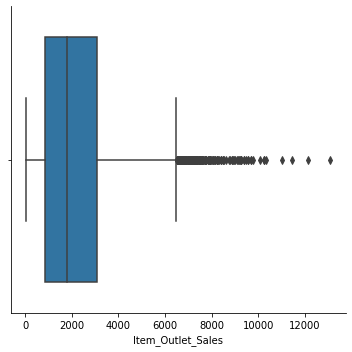

In [192]:
sns.catplot(data=train, kind='box', x='Item_Outlet_Sales')

<Figure size 1080x720 with 0 Axes>

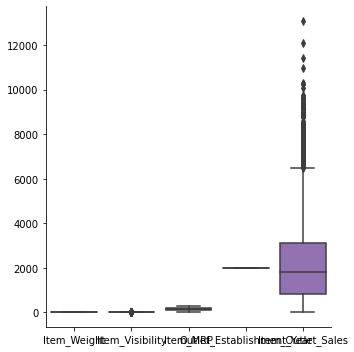

In [193]:
plt.figure(figsize=(15,10))
sns.catplot(data=train, kind='box')

In [194]:
train.head(20).style.highlight_max(color='red').highlight_min(color='green')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.809200,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.269200,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.618000,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.095000,OUT010,1998,nan,Tier 3,Grocery Store,732.380000
4,NCD19,8.930000,Low Fat,0.000000,Household,53.861400,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.400800,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.608800
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.658800,OUT013,1987,High,Tier 3,Supermarket Type1,343.552800
7,FDP10,nan,Low Fat,0.127470,Snack Foods,107.762200,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.763600
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.972600,OUT045,2002,nan,Tier 2,Supermarket Type1,1076.598600
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.821400,OUT017,2007,nan,Tier 2,Supermarket Type1,4710.535000


In [195]:
train[train['Item_Outlet_Sales'] == train['Item_Outlet_Sales'].max()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7188,NCE42,NaN,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648


In [196]:
train[train['Item_Outlet_Sales'] == train['Item_Outlet_Sales'].min()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
906,DRK12,9.500,Low Fat,0.000000,Soft Drinks,32.89,OUT010,1998,NaN,Tier 3,Grocery Store,33.29
6950,NCR42,9.105,Low Fat,0.064411,Household,33.39,OUT010,1998,NaN,Tier 3,Grocery Store,33.29


In [197]:
train.describe(exclude='number')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


Skewness: 1.177531


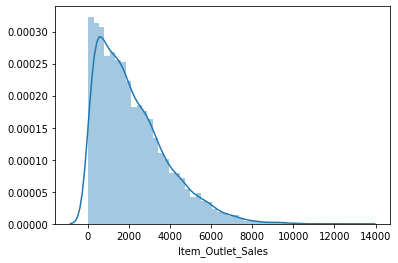

In [198]:
sns.distplot(train['Item_Outlet_Sales'])
print('Skewness: %f' % train['Item_Outlet_Sales'].skew())

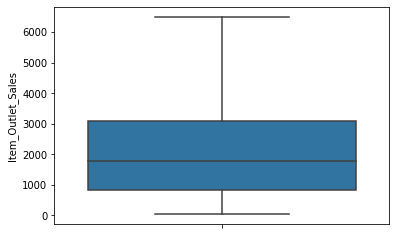

In [293]:
Q1 = train['Item_Outlet_Sales'].quantile(0.25)
Q3 = train['Item_Outlet_Sales'].quantile(0.75)
interquantile_range = Q3 - Q1
low = Q1 - 1.5*interquantile_range
high = Q3 + 1.5*interquantile_range

new_train = train.copy()
new_train['Item_Outlet_Sales']=np.where(new_train['Item_Outlet_Sales'] > high, high, new_train['Item_Outlet_Sales'])

new_train['Item_Outlet_Sales']=np.where(new_train['Item_Outlet_Sales'] < low, low, new_train['Item_Outlet_Sales'])

sns.boxplot(y=new_train["Item_Outlet_Sales"])

In [200]:
print("Low: ", low)
print("High: ", high)

Low:  -2566.3261
High:  6501.8699


- Fruits and Vegetables, and snacks as well as household items are the most frequently bought items, which indicates a correct trend that daily needs have higher consumption and sales than other items such as soft drinks and hard drinks which are a luxury based item.

- Starchy Food generated maximum sales, and seafood closely follows.
- The lower priced items have more sales
- In terms of visibility, the breakfast, seafood and dairy types of food are maximum
- Tier 2 cities have maximum sales, though the MRP remains the same so we can rule out any malpractice in selling
- Medium sized outlets have highest sales
- 1985 and 2004 had maximum sales
- Fat Content does not seem likely to affect the Item Outlet Sales, but when combined we have low fat products much higher sold than the regular fat content
- Lesser visibility relates to higher prices, and higher visibility are products with lower prices that are sold more.
- Weight does not seem to have a much of an effect on Sales

Text(0, 0.5, 'Item Type')

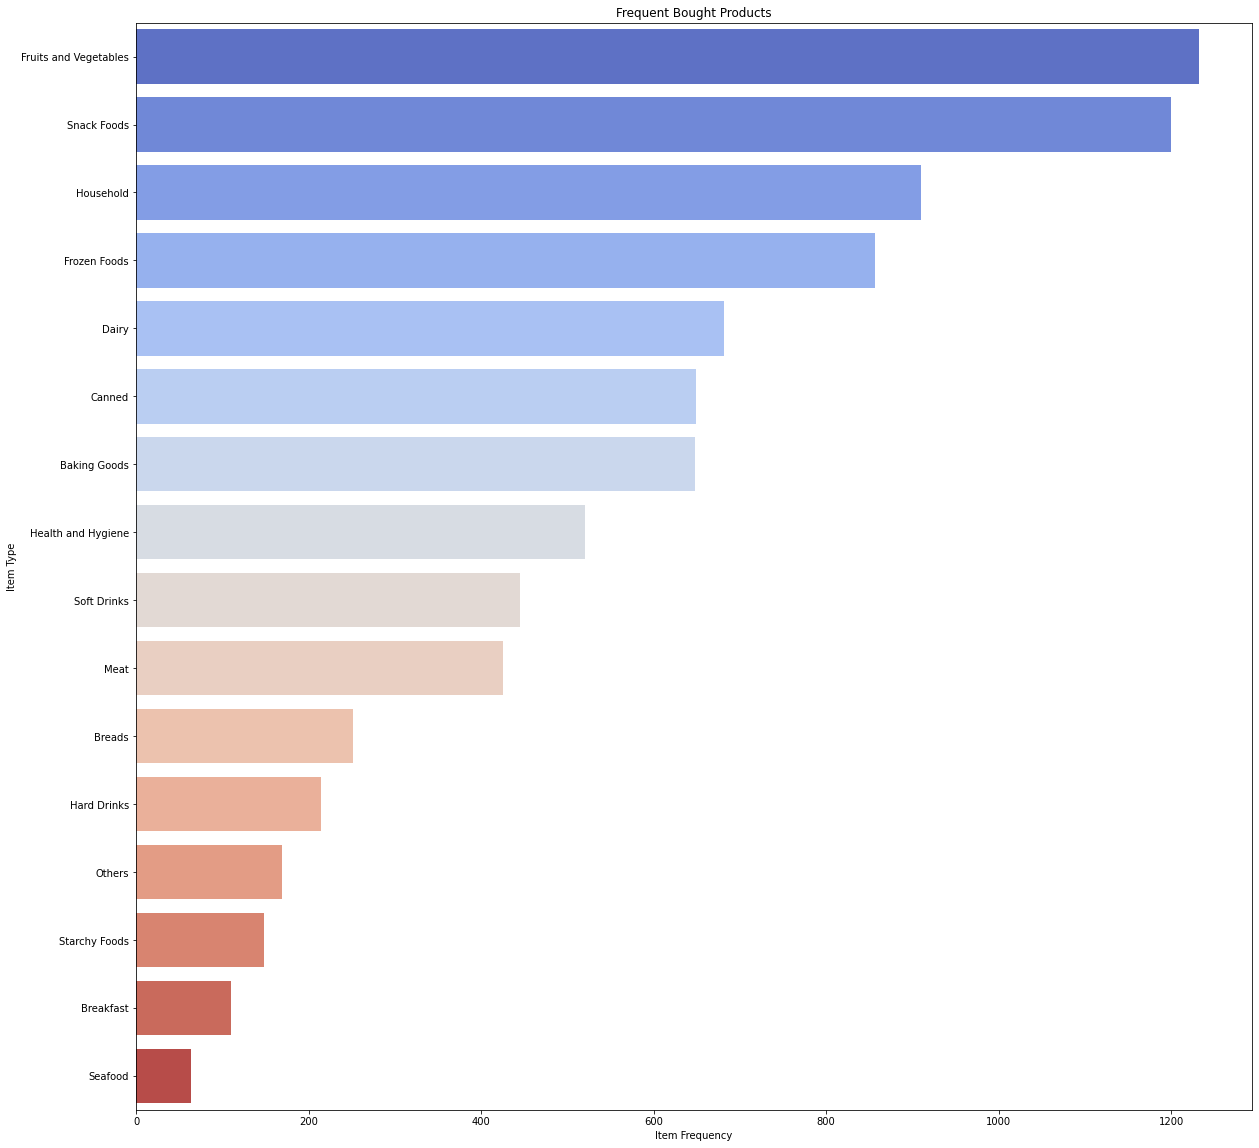

In [201]:
plt.figure(figsize=(20,20))
items = train['Item_Type'].value_counts()
sns.barplot(x=items,y=items.index,palette='coolwarm')
plt.title("Frequent Bought Products")
plt.xlabel("Item Frequency")
plt.ylabel("Item Type")

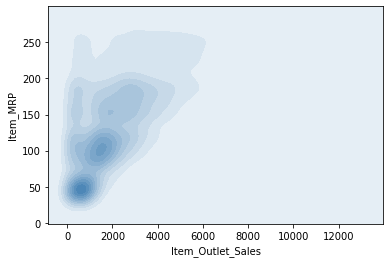

In [202]:
sns.kdeplot(train["Item_Outlet_Sales"], train["Item_MRP"], color="steelblue", shade=True)

Text(0, 0.5, 'item cost')

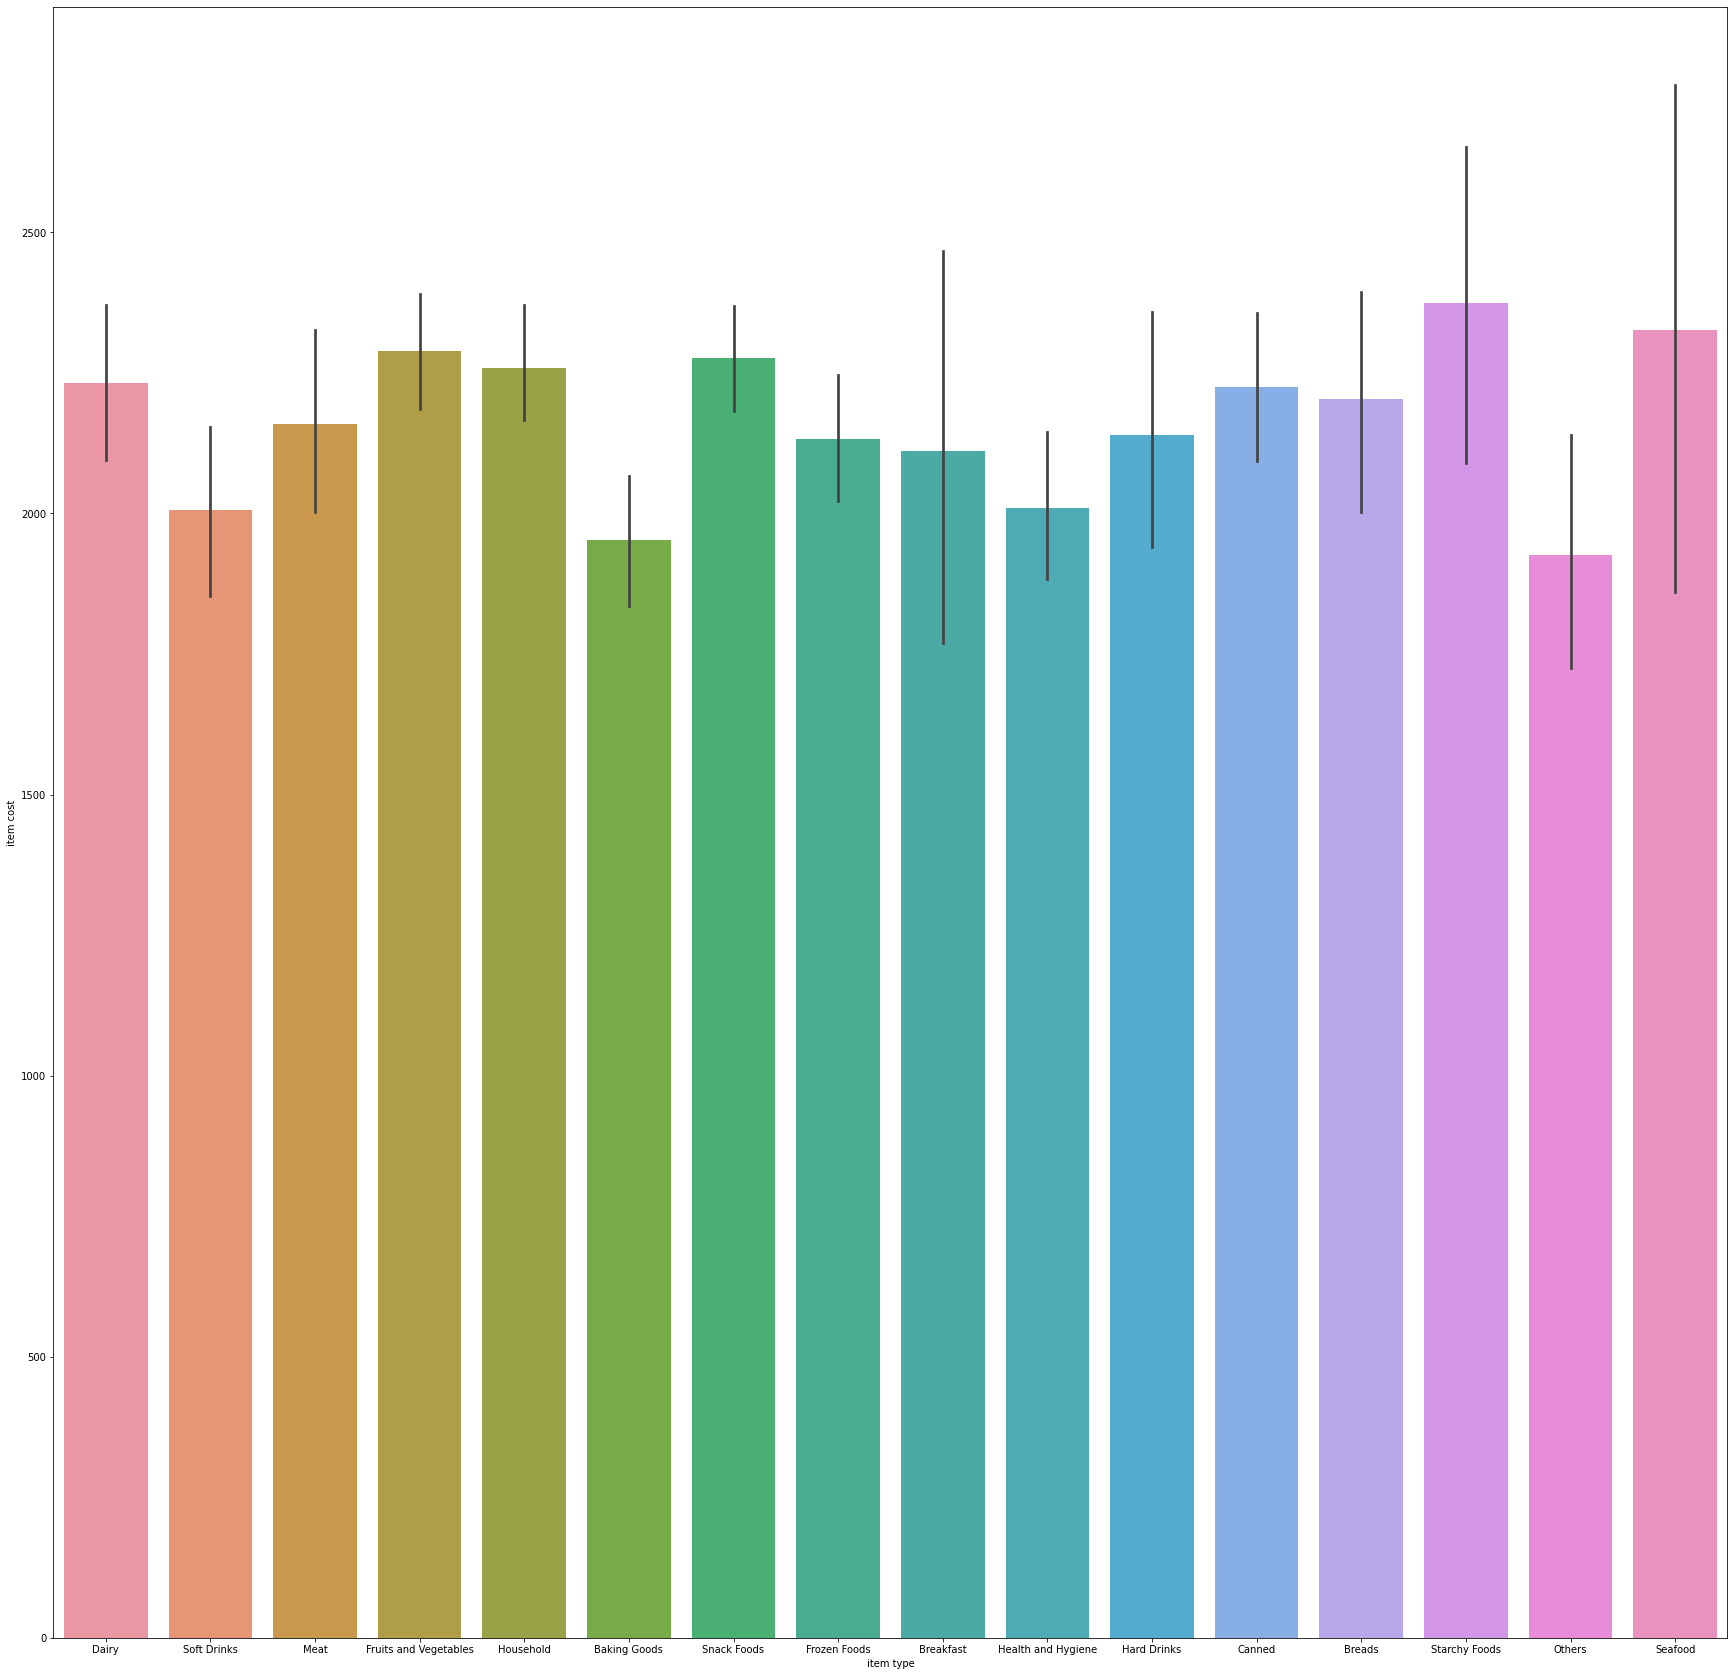

In [203]:
plt.figure(figsize=(30,30))
sns.barplot(x=train.Item_Type, y=train.Item_Outlet_Sales, data=train)
plt.xlabel('item type')
plt.ylabel('item cost')

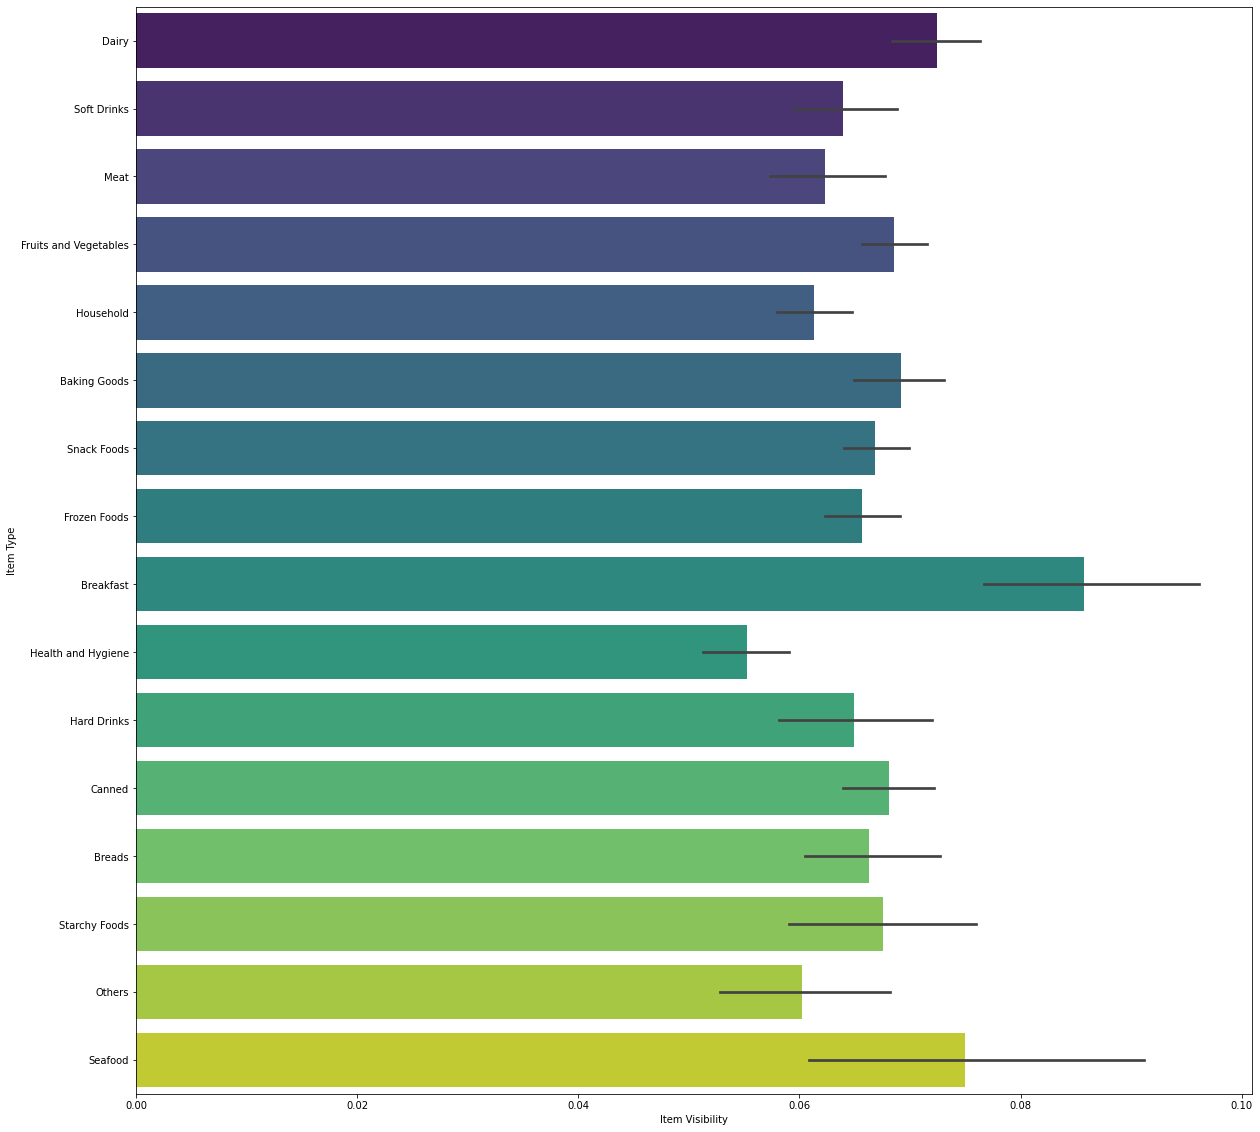

In [204]:
plt.figure(figsize=(20,20))
sns.barplot(x=train.Item_Visibility, y=train.Item_Type, data=train, palette='viridis')
plt.xlabel('Item Visibility')
plt.ylabel('Item Type')
plt.show()

In [205]:
train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].agg('mean').sort_values(ascending=False)

Outlet_Establishment_Year
1985    2483.677474
2004    2438.841866
1999    2348.354635
2007    2340.675263
1987    2298.995256
1997    2277.844267
2002    2192.384798
2009    1995.498739
1998     339.351662
Name: Item_Outlet_Sales, dtype: float64

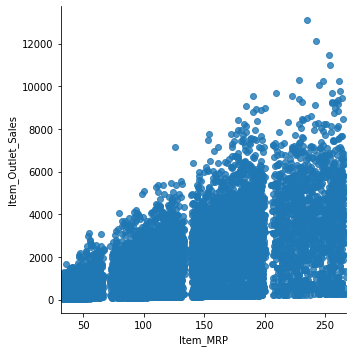

In [206]:
sns.lmplot(x="Item_MRP", y="Item_Outlet_Sales", data=train)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


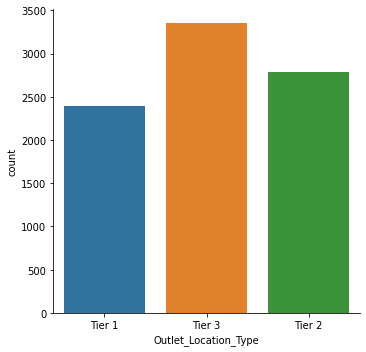

In [207]:
sns.factorplot("Outlet_Location_Type", data=train, kind="count")

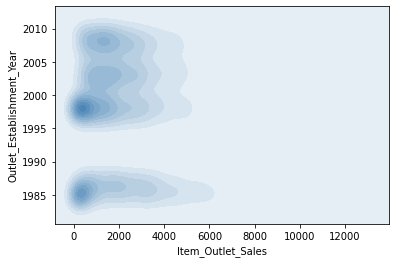

In [208]:
sns.kdeplot(train["Item_Outlet_Sales"], train["Outlet_Establishment_Year"], color="steelblue", shade=True)

Text(0.5, 1.0, 'Sales of Item in Different Locations')

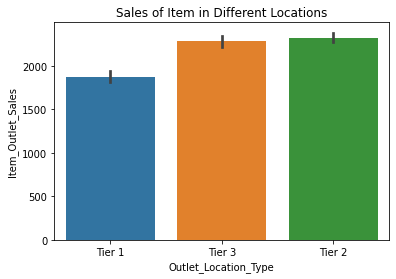

In [209]:
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data = train)
plt.title("Sales of Item in Different Locations")

In [29]:
train.groupby('Outlet_Size')['Item_Outlet_Sales'].agg('count').sort_values(ascending=False)

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Item_Outlet_Sales, dtype: int64

In [97]:
train.groupby(['Outlet_Identifier', 'Item_Type'])['Item_Outlet_Sales'].agg('count').sort_values().groupby('Outlet_Identifier').tail(1)

Outlet_Identifier  Item_Type            
OUT019             Snack Foods               75
OUT010             Fruits and Vegetables     79
OUT046             Fruits and Vegetables    126
OUT017             Snack Foods              128
OUT018             Fruits and Vegetables    135
OUT049             Snack Foods              139
OUT035             Snack Foods              140
OUT027             Fruits and Vegetables    140
OUT013             Fruits and Vegetables    142
OUT045             Fruits and Vegetables    143
Name: Item_Outlet_Sales, dtype: int64

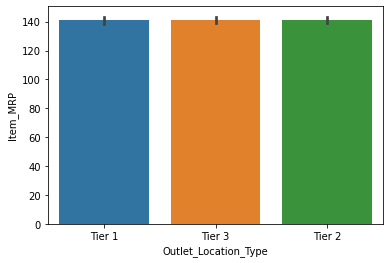

In [92]:
sns.barplot(x=train.Outlet_Location_Type, y=train.Item_MRP)

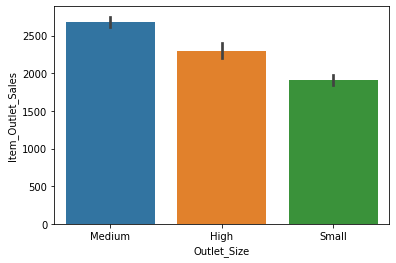

In [93]:
sns.barplot(x=train.Outlet_Size, y=train.Item_Outlet_Sales)

Text(0.5, 1.0, 'Years of Establishmeent and there Sales Margin')

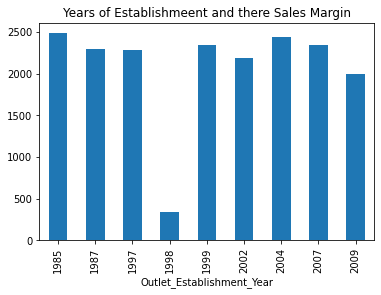

In [98]:
train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()
plt.title("Years of Establishmeent and there Sales Margin")

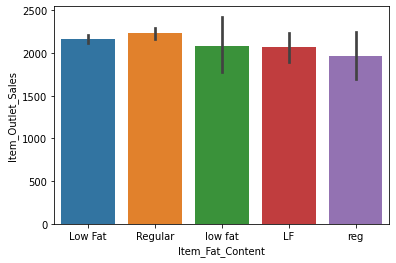

In [99]:
sns.barplot(x=train.Item_Fat_Content, y=train.Item_Outlet_Sales)

In [108]:
train['Item_Fat_Content'].replace({'reg':'Regular','low fat':'Low Fat','LF':'Low Fat'},inplace = True)

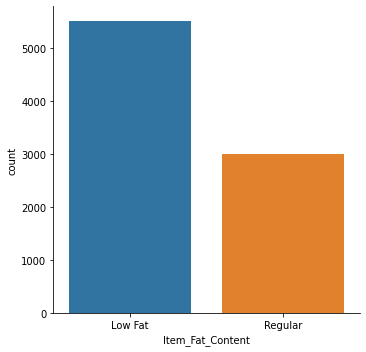

In [109]:
sns.catplot('Item_Fat_Content',kind = 'count',data = train)

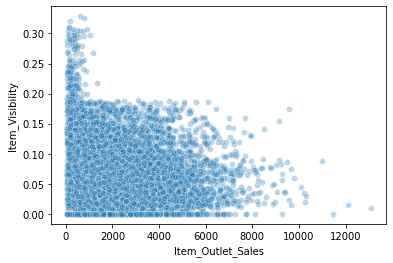

In [114]:
sns.scatterplot(x='Item_Outlet_Sales',y='Item_Visibility', data=train, alpha=0.3)

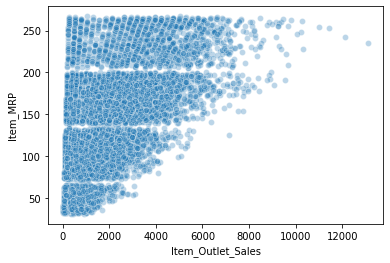

In [116]:
sns.scatterplot(x='Item_Outlet_Sales',y='Item_MRP',data=train, alpha=0.3)

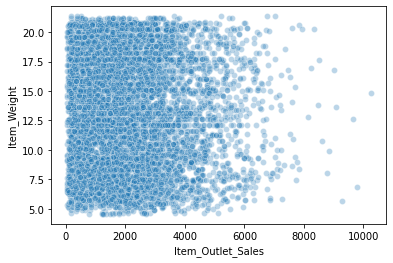

In [112]:
sns.scatterplot(x = "Item_Outlet_Sales", y="Item_Weight", data=train, alpha=0.3)

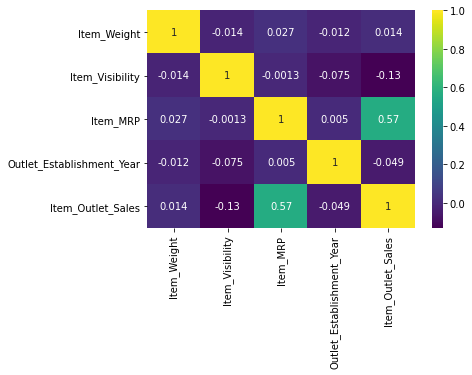

In [118]:
sns.heatmap(train.corr(), annot=True, cmap='viridis')

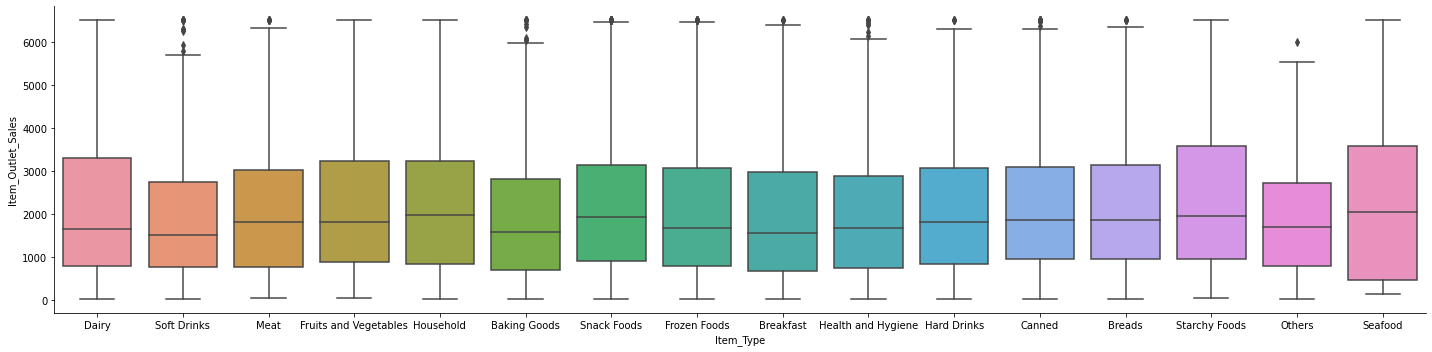

In [123]:
sns.catplot(x = 'Item_Type',y = 'Item_Outlet_Sales',kind = 'box',data = new_train,aspect=4)

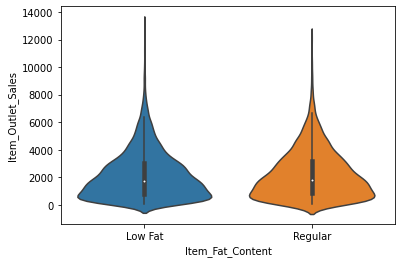

In [124]:
sns.violinplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=train)

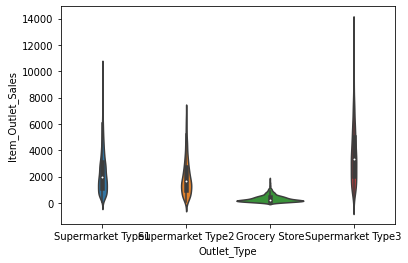

In [127]:
sns.violinplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train)

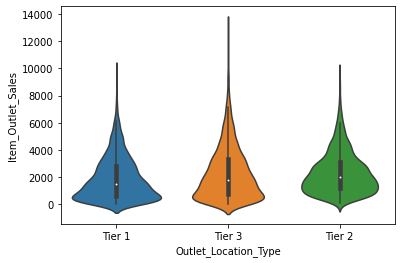

In [128]:
sns.violinplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train)

## Feature Engineering

In [294]:
new_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [295]:
new_train = new_train.drop(['Item_Identifier'], axis=1)
new_train['Item_Weight'].fillna(values.mean(),inplace = True)

In [296]:
# To balance the minority class
new_train['Outlet_Size'].fillna('Small',inplace  = True)

In [300]:
new_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [301]:
cat_cols = new_train.columns[new_train.dtypes == 'object'].tolist()
cat_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [302]:
encoded_df= pd.get_dummies(new_train[cat_cols], drop_first=True)
encoded_df.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [303]:
new_train = pd.concat([new_train, encoded_df], axis=1)
new_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,...,0,0,1,1,0,0,0,1,0,0
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,...,0,0,0,1,0,0,1,0,1,0
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,...,0,0,1,1,0,0,0,1,0,0
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,...,0,0,0,0,1,0,1,0,0,0
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,...,0,0,0,0,0,0,1,1,0,0


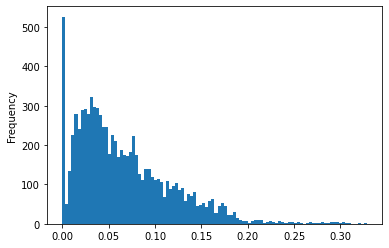

In [304]:
new_train['Item_Visibility'].plot(kind = 'hist',bins = 100)

In [305]:
a = new_train[new_train['Item_Visibility']!=0]['Item_Visibility'].median()
a

0.057792342999999996

In [306]:
new_train['Item_Visibility'] = new_train['Item_Visibility'].replace(0.00,a)

In [307]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [308]:
sc.fit(new_train[['Item_MRP']])
sc.fit(new_train[['Item_Weight']])
sc.fit(new_train[['Item_Visibility']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [309]:
new_train['MRP_Scaled'] = sc.transform(new_train[['Item_MRP']])
new_train['Item_Weight_Scaled'] = sc.transform(new_train[['Item_Weight']])
new_train['Item_Visibility_Scaled'] = sc.transform(new_train[['Item_Visibility']])

In [310]:
new_train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Fat_Content_low fat',
       'Item_Fat_Content_reg', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',


In [311]:
new_train = new_train.drop(['Item_MRP',
                            'Item_Weight', 'Item_Visibility',
                            'Item_Type', 'Item_Fat_Content',
                            'Outlet_Identifier', 'Outlet_Location_Type',
                           'Outlet_Type', 'Outlet_Size'], axis=1)

In [312]:
new_train

,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,MRP_Scaled,Item_Weight_Scaled,Item_Visibility_Scaled
0,1999,3735.1380,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,5115.201897,189.056415,-1.098896
1,2009,443.4228,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,987.229410,119.826748,-1.032720
2,1999,2097.2700,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,2899.213523,357.010044,-1.084297
3,1998,732.3800,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,3728.269504,391.829698,-0.243868
4,1987,994.7052,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1101.769688,181.478019,-0.243868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1987,2778.3834,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,4392.440081,139.182380,-0.264533
8519,2002,549.2850,0,1,0,0,0,0,0,0,...,0,1,1,0,1,0,0,2213.860306,170.212837,-0.465278
8520,2004,1193.1136,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,1742.062176,215.683209,-0.706889
8521,2009,1845.5976,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,2110.962081,146.248721,1.546852


In [313]:
y = new_train['Item_Outlet_Sales']
X = new_train.drop('Item_Outlet_Sales', axis=1)

In [314]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [315]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [316]:
lr_model = LinearRegression(normalize=True,fit_intercept= True)
lr_model.fit(X,y)
y_pred = lr_model.predict(x_test)

In [317]:
np.sqrt(mean_squared_error(y_test, y_pred))

1038.181478672767

In [318]:
XGB = XGBRegressor()
xgb_fit = XGB.fit(X,y)
y_pred = xgb_fit.predict(x_test)

In [319]:
np.sqrt(mean_squared_error(y_test, y_pred))

662.4332709408842

## Transforming Unseen Data

In [342]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [343]:
test = test.drop(['Item_Identifier'], axis=1)
test['Item_Weight'].fillna(values.mean(),inplace = True)

In [344]:
test['Outlet_Size'].fillna('Small',inplace  = True)

In [345]:
test.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [346]:
cat_cols = test.columns[test.dtypes == 'object'].tolist()
cat_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [347]:
encoded_test = pd.get_dummies(test[cat_cols], drop_first=True)
encoded_test.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1


In [348]:
new_test = pd.concat([test, encoded_test], axis=1)
new_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,...,0,0,1,1,0,0,0,1,0,0
1,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,...,0,0,0,0,1,1,0,1,0,0
2,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,...,0,0,0,0,1,0,1,0,0,0
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,...,0,0,0,0,1,1,0,1,0,0
4,773.386376,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,...,0,0,0,1,0,0,1,0,0,1


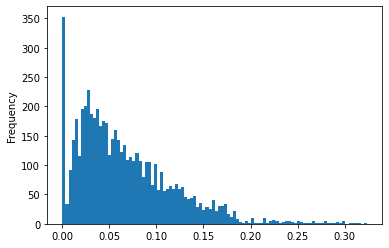

In [349]:
new_test['Item_Visibility'].plot(kind = 'hist',bins = 100)

In [350]:
a = new_test[new_test['Item_Visibility']!=0]['Item_Visibility'].median()
a

0.05795674

In [351]:
new_test['Item_Visibility'] = new_test['Item_Visibility'].replace(0.00,a)

In [352]:
sc.fit(new_test[['Item_MRP']])
sc.fit(new_test[['Item_Weight']])
sc.fit(new_test[['Item_Visibility']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [353]:
new_test['MRP_Scaled'] = sc.transform(new_test[['Item_MRP']])
new_test['Item_Weight_Scaled'] = sc.transform(new_test[['Item_Weight']])
new_test['Item_Visibility_Scaled'] = sc.transform(new_test[['Item_Visibility']])

In [356]:
new_test = new_test.drop([ 'Item_MRP',
                            'Item_Weight', 'Item_Visibility',
                            'Item_Type', 'Item_Fat_Content',
                            'Outlet_Identifier', 'Outlet_Location_Type',
                           'Outlet_Type', 'Outlet_Size'], axis=1)

In [358]:
x_train.columns

Index(['Outlet_Establishment_Year', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Fat_Content_low fat',
       'Item_Fat_Content_reg', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_T

In [359]:
new_test.columns

Index(['Outlet_Establishment_Year', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Fat_Content_low fat',
       'Item_Fat_Content_reg', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_T

In [360]:
preds = xgb_fit.predict(new_test)

In [366]:
preds = abs(preds)

In [367]:
submission = pd.DataFrame({'Item_Identifier':test['Item_Identifier'], 'Outlet_Identifier':test['Outlet_Identifier'], 'Item_Outlet_Sales':preds})

In [368]:
submission.to_csv("Submit2.csv", index=False)